# TALLER 9

Natali André Julio Beltran CC. 1098807231\
Brayan Alejandro Murillo González CC.1007338060

In [1]:
import numpy as np
import scipy as sc
import scipy.linalg as la
import matplotlib.pyplot as plt


Sistema de ecuaciones de un problema físico:


$$x'=2x-y+z$$
$$y'= 3y-1z$$
$$z'=2x+y+3z$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.
a) Diagonalize $A$.

b) Use el hecho de que $f(A) = U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.
. c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.
d) Compare el resultado a la solución analítica,

#Solución

Matriz de coeficientes:

In [2]:
A1 = np.array([2,-1,1])
A2 = np.array([0,3,-1])
A3 = np.array([2,1,3])
A  = np.asmatrix([A1,A2,A3])

E,U = la.eig(A) # Autovalores y autovectores



In [3]:
U = np.asmatrix(U)  # convertimos el array de autovectores en una matriz de numpy

D = U.I @ (A @U)       #Diagonalización de A



$$r=e^{At}r(0)$$

In [4]:
f = lambda t: np.exp(E*t)    # Función para evaluar el término e^At


time = np.linspace(0,2,100)  # Valores para el tiempo de 0 a 2 

r0 = np.array([1,1,2])       # Condición inicial

r = np.zeros([len(time),3])  # Array para almacenar las coordenas x,y,z de r


cont = 0  # contador

""" Ciclo para evaluar el término e^At en cada t y autovalor, se almacenan los datos en un array"""
for t in time:
  Diag = np.diag(f(t),0)
  f_A = U @ ( Diag @ U.I)   # F(A)
  r[cont]=(f_A @ r0)        # Multiplicación de F(A) por las condiciones iniciales, el resultado es un vector [x,y,z], se almacena en r
  cont=cont+1
  

r[0]=r0  # Se remplazan las condiciones iniciales del problema en el array de posiciones r


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


#Gráficas de las soluciones:

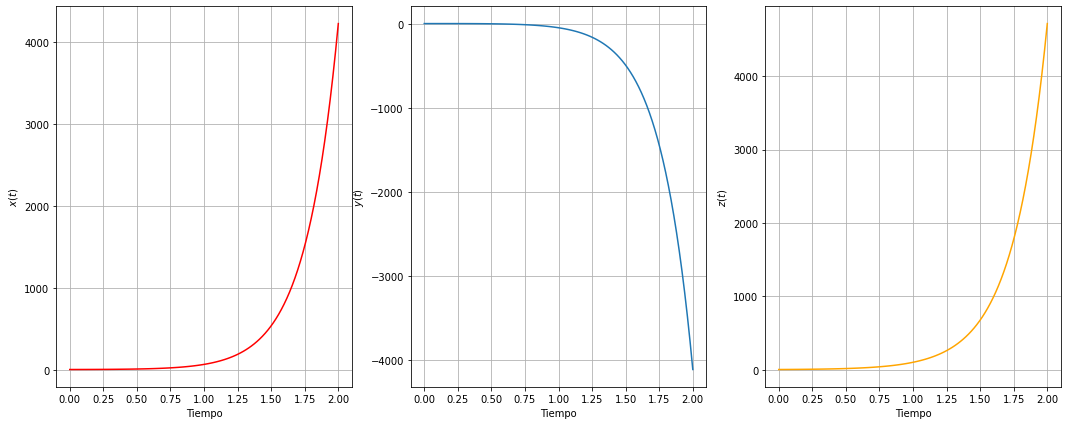

In [5]:
""" Gráfica de x(t) """

plt.figure(figsize=(18,7))
plt.subplot(1, 3, 1)
plt.plot(time,r[:,0],color="red") # [:,0] extrae todas las coordenadas x en el array r
plt.xlabel("Tiempo")
plt.ylabel("$x(t)$")
plt.grid()


""" Gráfica de y(t) """
plt.subplot(1,3,2)
plt.plot(time,r[:,1])# [:,1] extrae todas las coordenadas y en el array r
plt.xlabel("Tiempo")
plt.ylabel("$y(t)$")
plt.grid()


""" Gráfica de z(t) """
plt.subplot(1,3,3)
plt.plot(time,r[:,2],color="orange") # [:,2] extrae todas las coordenadas z en el array r
plt.xlabel("Tiempo")
plt.ylabel("$z(t)$")
plt.grid()
plt.show()

# Verificación analítica de las soluciones $x(t)$, $y(t)$, $z(t)$

$$2x(t)= x(0)(e^{2t}(1+e^{2t}-2t))+y(0)(-2te^{2t})+z(0)(e^{2t}(e^{2t}-1))$$/

$$2y(t)=  x(0)(-e^{2t}(-1+e^{2t}-2t))+y(0)(2(t+1)e^{2t})+z(0)(-e^{2t}(e^{2t}-1))$$/
$$2z(t)=  x(0)(e^{2t}(-1+e^{2t}+2t))+y(0)(2te^{2t})+z(0)(-e^{2t}(e^{2t}+1))$$

In [6]:
""" Se define cada una de las funciones """

def x(t):
  T1 = np.exp(2*t)*(1+np.exp(2*t)-2*t)
  T2 = -2*t*np.exp(2*t)
  T3 = 2*np.exp(2*t)*(np.exp(2*t)-1)
  return (0.5)*(T1+T2+T3)

def y(t):
  T1 = -np.exp(2*t)*(-1+np.exp(2*t)-2*t)
  T2 = 2*np.exp(2*t)*(t+1)
  T3 = -2*np.exp(2*t)*(np.exp(2*t)-1)
  return (0.5)*(T1+T2+T3)

def z(t):
  T1 = np.exp(2*t)*(-1+np.exp(2*t)+2*t)
  T2 = 2*t*np.exp(2*t)
  T3 = 2*np.exp(2*t)*(np.exp(2*t)+1)
  return (0.5)*(T1+T2+T3)



In [7]:
t=np.linspace(0.001,2,100)  # valores de t entre 0 y 2 para evaluar las funciones anteriores


#Gráficos de $x(t)$, $y(t)$, $z(t)$





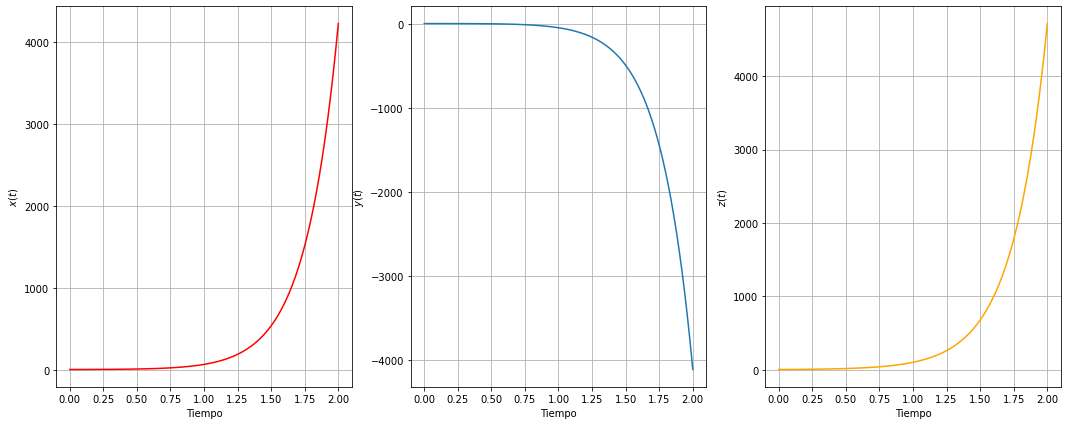

In [8]:

""" Grafico de x(t) analítico """
plt.figure(figsize=(18,7))
plt.subplot(1, 3, 1)
plt.plot(t,x(t),color="red")
plt.xlabel("Tiempo")
plt.ylabel("$x(t)$")
plt.grid()



""" Grafico de y(t) analítico """
plt.subplot(1,3,2)
plt.plot(t,y(t))
plt.xlabel("Tiempo")
plt.ylabel("$y(t)$")
plt.grid()



""" Grafico de z(t) analítico """
plt.subplot(1,3,3)
plt.plot(t,z(t),color="orange")
plt.xlabel("Tiempo")
plt.ylabel("$z(t)$")
plt.grid()
plt.show()

# Conclusión
Se puede observar que los gráficos obtenidos "analíticamente" son exactamente los mismos que se obtienen con la solucion computacional para 
 $x(t)$, $y(t)$, $z(t)$ con $t$ entre $[0,2]$ por lo tanto concluímos que el método computacional para hallar las funciones concuerda con las soluciones esperadas.


# Punto 2

Matriz de código:

In [9]:
A = np.asmatrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])

Diccionario para la decodificación:

In [10]:
cod={"1":"A","2":"B","3":"C","4":"D","5":"E","6":"F","7":"G","8":"H","9":"I","10":"J","11":"K","12":"L","13":"M","14":"N","15":"O","16":"P","17":"Q","18":"R","19":"S","20":"T","21":"U","22":"V","23":"W","24":"X","25":"Y","26":"Z","27":" "}

Mensaje a decodificar:

In [11]:
mes = np.array([[47,49,-19,257,487],   # Matriz del mensaje
              [10,-9,63,137,236],
              [79,142,-184,372,536],
              [59,70,-40,332,588]]) 

mes = np.asmatrix(mes)   # Se pasa el array a formato de matriz de numpy

In [12]:

B = mes @ A.I # Matriz final con el mensaje

B = np.array(B) # Para efectos de la decodificación pasamos la matriz del mensaje a formato array de numpy

l = []   # Lista para almacenar el mensaje cuando sea decodificado
 

In [13]:
""" Rutina para desencriptar el mensaje"""

""" El indice i recorre las filas de la matriz del mensaje,
    el indice j recorre los elementos de cada fila, mira cual es el numero y le asigna su 
    respectiva letra acorde al diccionario preestablecido cod """

for i in range(0,4):

  for j in range(0,5):

    l.append(cod[str(round(B[i,:][j]))])


mensaje = ''.join(l) # Concatenación de los caracteres almacenados en la lista con el mensaje

print("El mensaje es : %s"%(mensaje)) 

El mensaje es : ARE YOU HAVING FUN  


# Punto 3 Multiplicación de matrices

Para multiplicar dos matrices $A$ Por otra matriz $B$
Las matrices tienen que cumplir los siguientes requisitos:

1. Ser matrices cuadradas
2. En caso de no ser matrices cuadradas, el numero de columnas de A tiene que ser igual al número de filas de B

Si $A$ es $mxn$ y $B$ es $nxp$ la matriz del producto $AB$ es de tamaño  $mxp$


In [14]:

def prodmat(A,B):

  if A.shape[1]==B.shape[0]: # Condicional para que se pueda efectuar el producto de matrices

    AB = np.zeros((A.shape[0],B.shape[1]))# Se crea una matriz con las filas de a y las columnas de b como columnas para almacenar los coeficientes
                                               # de la multiplicación
    
    for i in range(A.shape[0]):  # indice para seleccionar las filas de A

      for j in range(B.shape[1]): # indice para seleccionar las columnas de B

        for h in range(A.shape[1]): # indice para ir recorriendo los coeficientes de cada fila de A y cada columna de B

          AB[i][j] = AB[i][j] +A[i][h] * B[h][j] # Valor de multiplicar la fila i-esima de A, por la columna j-esima de B
    
    print(AB)

  else:

    print("No se pueden multiplicar las matrices ya que el numero de columnas de A: %i es diferente del numero de filas de B: %i" %(A.shape[1],B.shape[0]))      



Pruebas de la funcion para la multiplicación de matrices


In [15]:
""" Se tienen las siguientes matrices"""


A = np.array([[1,2,3,4],[1,4,5,6],[3,7,8,9],[4,5,4,2]])
B = np.array([[1,1,4,7],[2,3,5,8],[2,3,6,9],[4,4,3,4]])

""" Con la funciónde numpy tenemos que A*B es: """

AB = np.asmatrix(A)@ np.asmatrix(B)
print(AB)



[[ 27  32  44  66]
 [ 43  52  72 108]
 [ 69  84 122 185]
 [ 30  39  71 112]]


In [16]:
""" El producto AB con la funcion que se construyó es : """
AB=prodmat(A,B)

[[ 27.  32.  44.  66.]
 [ 43.  52.  72. 108.]
 [ 69.  84. 122. 185.]
 [ 30.  39.  71. 112.]]


Prueba para cuando las matrices no cumplen los requisitos

In [17]:
A = np.array([[1,2,3,4],[1,4,5,6],[3,7,8,9],[4,5,4,2]])
B = np.array([[2,3,5,8],[2,3,6,9],[4,4,3,4]])

AB=prodmat(A,B)

No se pueden multiplicar las matrices ya que el numero de columnas de A: 4 es diferente del numero de filas de B: 3


In [18]:
AB = np.asmatrix(A)@ np.asmatrix(B)
print(AB)


ValueError: ignored